## <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [58]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold, train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [2]:
df = pd.read_csv("D:\CS\Data Science\TMLC\Solution\Project 1 Road Traffic Severity Classification\Dataset\RTA Dataset.csv")
print(df.shape)
df.head()

(12316, 32)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#### Observations:

Data contains 12316 samples and 32 features. There is 1 timestamp, 2 int and rest all categorical features. Target is categorical.

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

In [3]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [4]:
df.shape

(12316, 32)

In [5]:
# renaming columns
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [6]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

#### Observations:
There are missing values in the dataset.

In [7]:
df.describe(include='all')

,time,day_of_week,driver_age,driver_sex,educational_level,vehicle_driver_relation,driving_experience,vehicle_type,vehicle_owner,service_year,vehicle_defect,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,casualty_work,casualty_fitness,pedestrian_movement,accident_cause,accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316.000000,12316.000000,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,NaN,NaN,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [9]:
df.isna().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [10]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [11]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique value in day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique value in driver_age:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique value in driver_sex:
['Male' 'Female' 'Unknown'] 

Unique value in educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique value in vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique value in driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique value in vehicle_type:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 

Unique value

In [12]:
# converting all objects to category
for col in df.drop(['time', 'vehicles_involved', 'casualties'], axis=1):
    df[col] = df[col].astype('category')

In [13]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  category      
 2   driver_age               12316 non-null  category      
 3   driver_sex               12316 non-null  category      
 4   educational_level        11575 non-null  category      
 5   vehicle_driver_relation  11737 non-null  category      
 6   driving_experience       11487 non-null  category      
 7   vehicle_type             11366 non-null  category      
 8   vehicle_owner            11834 non-null  category      
 9   service_year             8388 non-null   category      
 10  vehicle_defect           7889 non-null   category      
 11  accident_area            12077 non-null  category      
 12  lanes                    11931 n

In [15]:
# checking constant features
[col for col in df if df[col].nunique()==1]

[]

In [16]:
# checking missing values
df.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [17]:
df.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
time,12316,2024-04-14 14:17:50.768106496,2024-04-14 00:01:00,2024-04-14 10:31:00,2024-04-14 15:10:00,2024-04-14 18:10:00,2024-04-14 23:59:00,NaN
vehicles_involved,12316.0,2.040679,1.0,2.0,2.0,2.0,7.0,0.68879
casualties,12316.0,1.548149,1.0,1.0,1.0,2.0,8.0,1.007179


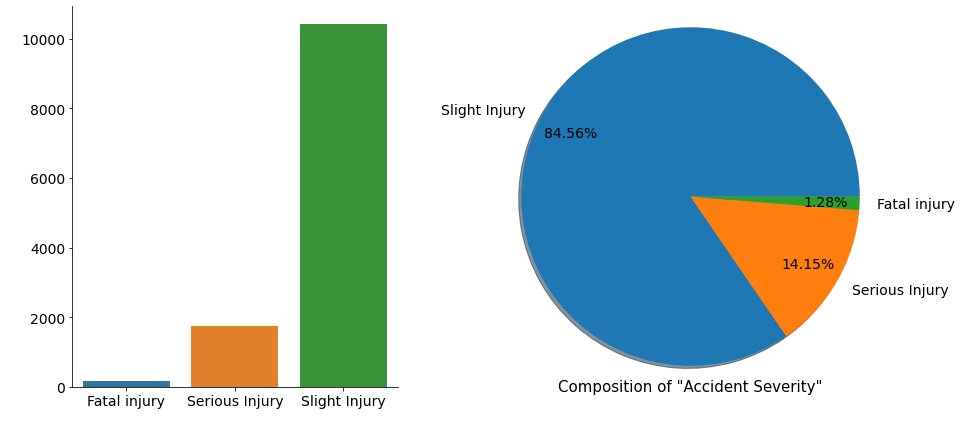

In [18]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [19]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df["time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

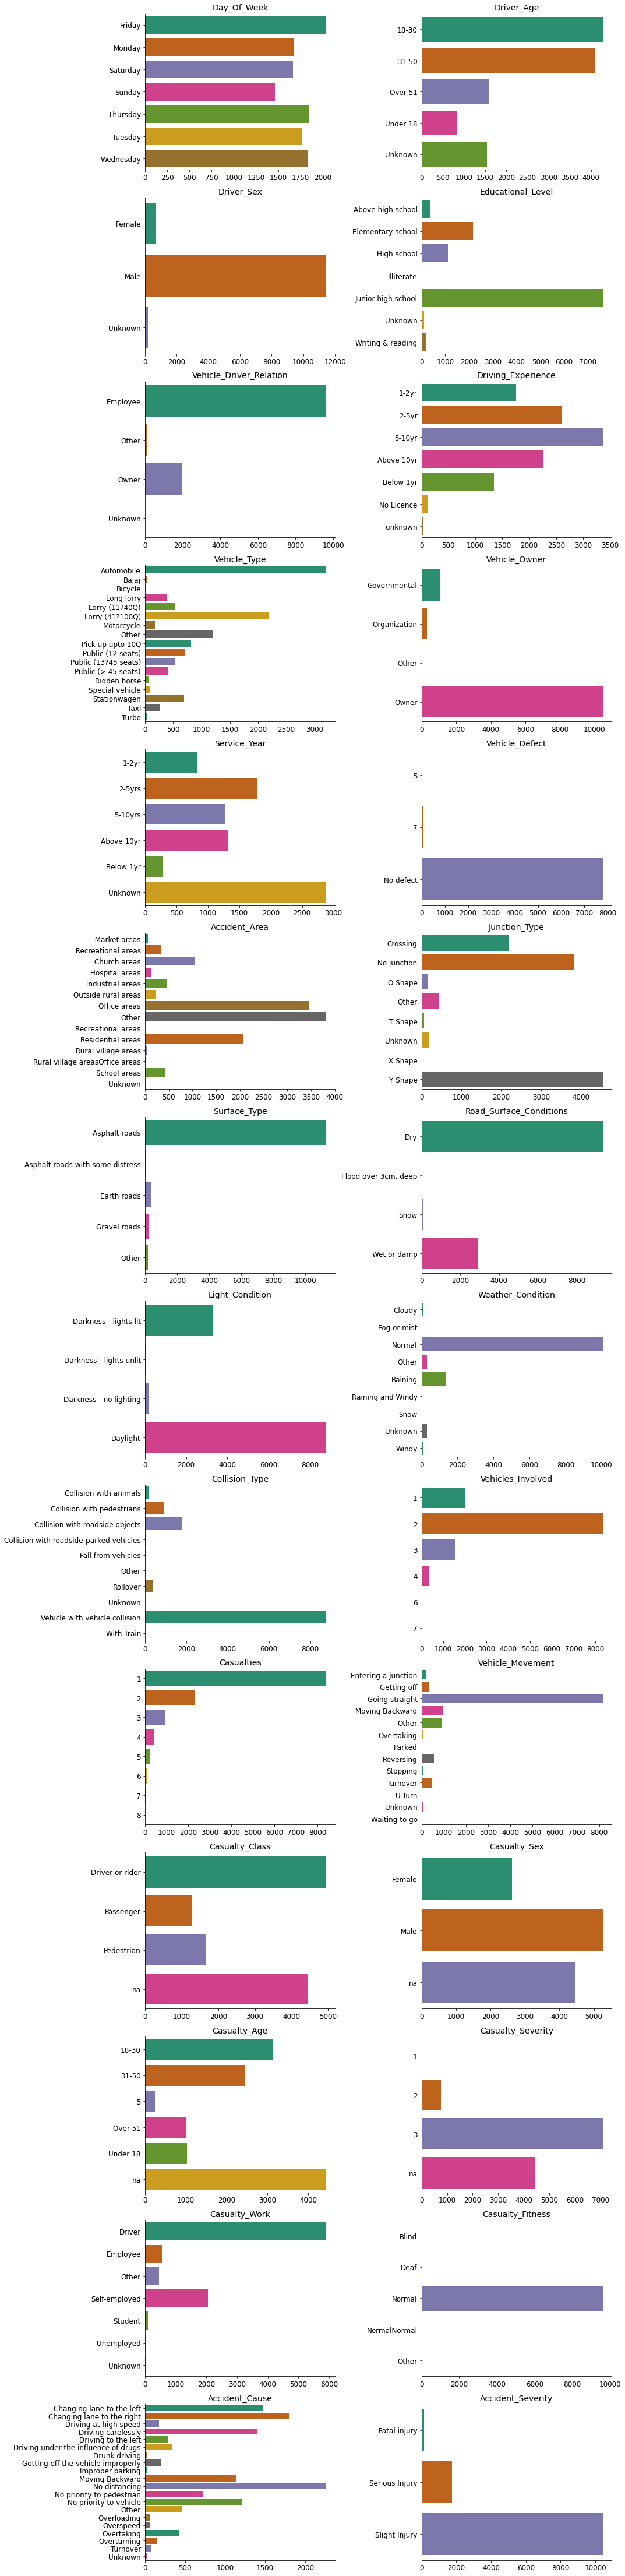

In [20]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

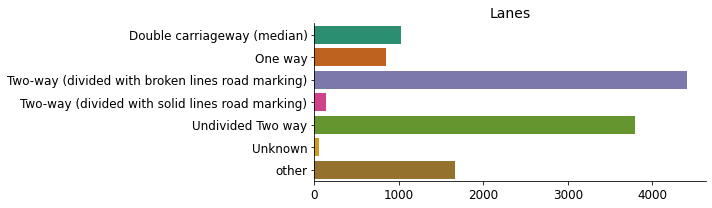

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

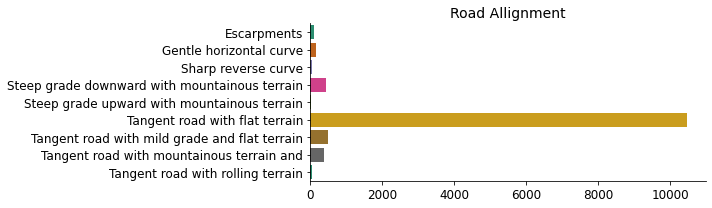

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

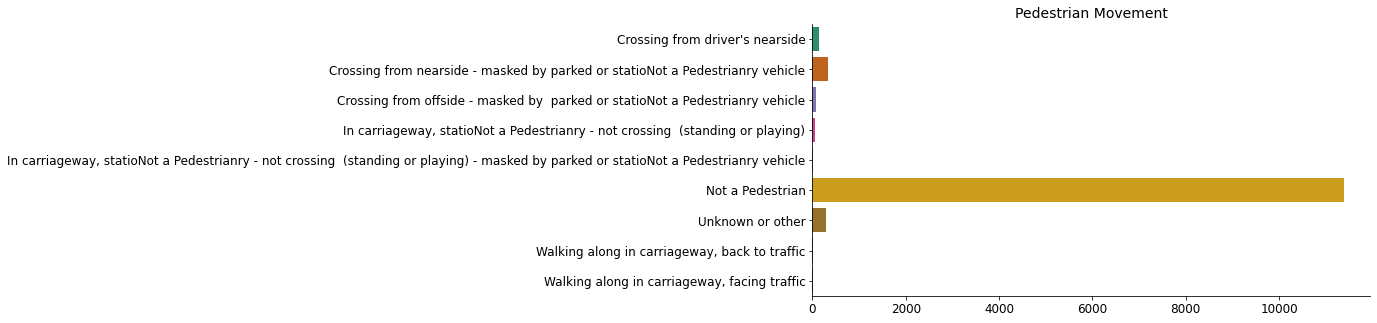

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

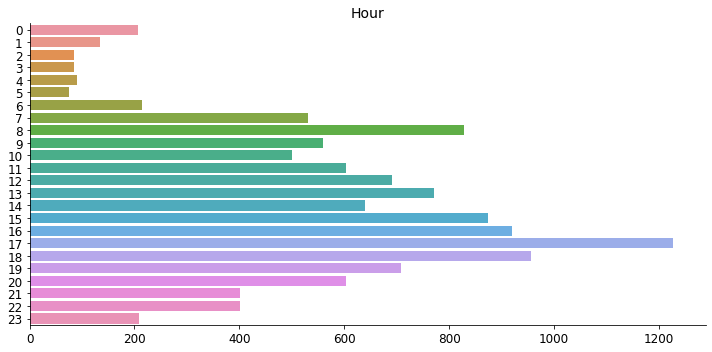

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

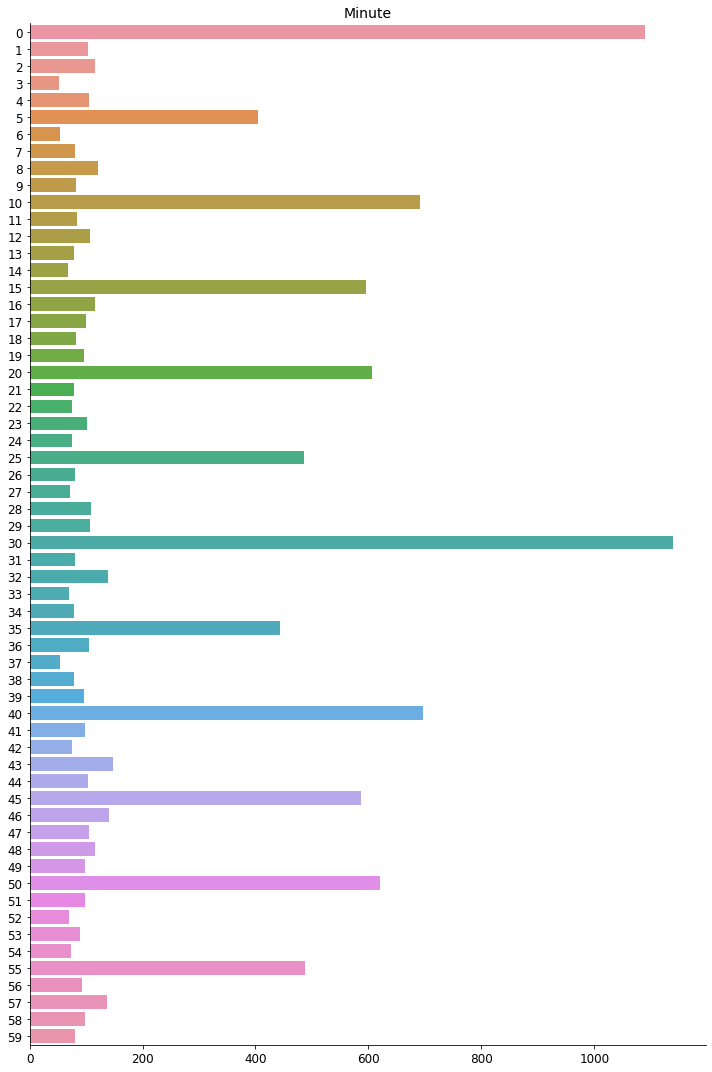

In [25]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.
    
</div>

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

In [26]:
df.isna().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [27]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [28]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [29]:
df.isna().sum() 

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [30]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

In [31]:
df.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,road_allignment,junction_type,surface_type,road_surface_conditions,light_condition,weather_condition,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16,Slight Injury,1,6


<AxesSubplot:>

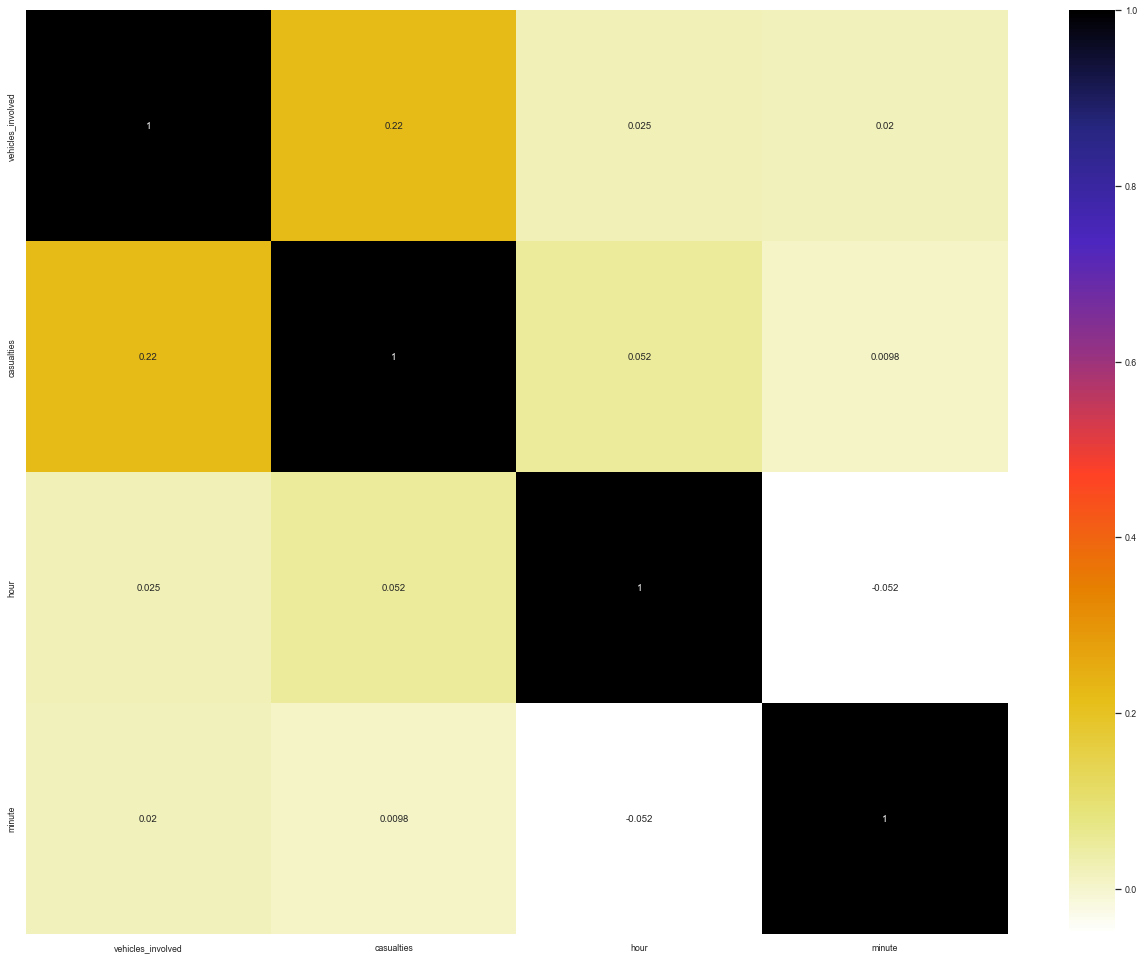

In [32]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [33]:
def imbalanced_features(df):
    mod_imb=[] # moderately imbalanced
    hi_imb=[] # highly imbalanced

    for col in df.columns:
        try:
            if (df[col].value_counts()/df.shape[0]).max() > 0.9:
                hi_imb.append(col)
            elif (df[col].value_counts()/df.shape[0]).max() > 0.7 and col not in hi_imb:
                mod_imb.append(col)
        except Exception as e:
            print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

    print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
    print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
    print(mod_imb, "\n")
    print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
    print(hi_imb)
imbalanced_features(df)

====================  Imbalanced features ====================
No of moderately imbalanced features (75%+ data on a single class):  7 

['vehicle_owner', 'road_allignment', 'road_surface_conditions', 'light_condition', 'weather_condition', 'collision_type', 'accident_severity'] 

No of highly imbalanced features (90%+ data on a single class):  3 

['driver_sex', 'surface_type', 'pedestrian_movement']


In [37]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']


In [38]:
counter = Counter(y)

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

Class= Slight Injury, n=10415 (84.56%)
Class= Serious Injury, n=1743 (14.15%)
Class= Fatal injury, n=158 (1.28%)


In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)

for k,v in counter.items():
    per = 100*v/len(y)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

Class= Slight Injury, n=10415 (33.33%)
Class= Serious Injury, n=10415 (33.33%)
Class= Fatal injury, n=10415 (33.33%)


In [40]:
df = pd.concat([X, y], axis=1)
print("Upsampled data shape: ", df.shape)

Upsampled data shape:  (31245, 29)


In [41]:
# selecting a good baseline model using cross validation

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [42]:
names = []
results = []
for name, model in models:
    fold = KFold(n_splits=10)
    score = cross_val_score(model, X, y, cv=fold, scoring='accuracy')
    names.append(name)
    results.append(score)

In [43]:
plotdict = dict(zip(names, results))

for k,v in plotdict.items():
    print(f"{k}: {round(v.mean(),5)}")

KNN: 0.8007
LOG: 0.4305
DTC: 0.82738
RFC: 0.91708


In [44]:
model = RandomForestClassifier()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21871, 28) (9374, 28) (21871,) (9374,)


In [46]:
# fitting model
model.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
# predicting
y_pred = model.predict(X_test)

In [48]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.9324727970983572


In [49]:
# getting feature importance
model.feature_importances_

array([0.05664797, 0.04737529, 0.00892958, 0.03117435, 0.04120635,
       0.04739161, 0.01402861, 0.03469363, 0.04145425, 0.04366464,
       0.01561822, 0.03975651, 0.00740618, 0.02624673, 0.04369962,
       0.01931942, 0.02916696, 0.05385452, 0.0607432 , 0.02823201,
       0.01890119, 0.01637935, 0.02752236, 0.01380377, 0.0093713 ,
       0.05352298, 0.07149498, 0.09839441])

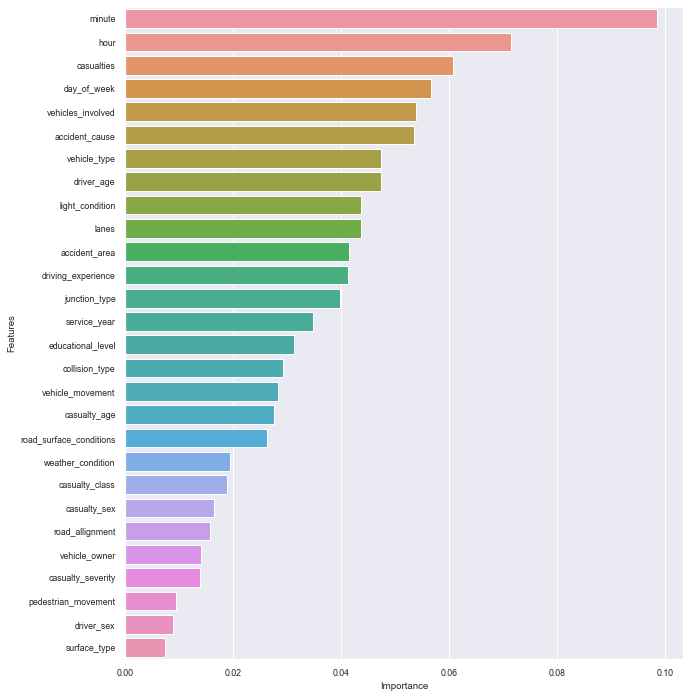

In [50]:
df_importance = pd.DataFrame()
df_importance['Features'] = X.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [51]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['minute',
 'hour',
 'casualties',
 'day_of_week',
 'vehicles_involved',
 'accident_cause',
 'vehicle_type',
 'driver_age',
 'light_condition',
 'lanes']

In [53]:
df_top10 = df[top10]
df_top10

,minute,hour,casualties,day_of_week,vehicles_involved,accident_cause,vehicle_type,driver_age,light_condition,lanes
0,2,17,1,1,1,9,0,0,3,2
1,2,17,1,1,1,16,11,1,3,4
2,2,17,1,1,1,0,5,0,3,6
3,6,1,1,3,1,1,11,0,0,6
4,6,1,1,3,1,16,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...
31240,10,15,0,5,1,17,14,1,3,3
31241,40,16,0,4,0,9,8,0,3,6
31242,55,14,0,5,0,4,0,0,3,2
31243,26,14,0,1,0,9,0,0,3,2


In [54]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(21871, 10) (9374, 10) (21871,) (9374,)


In [55]:
# fitting model
model.fit(X_train_new, y_train_new)

RandomForestClassifier()

In [56]:
# predicting
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.9097503733731598


In [61]:
params={
    'n_estimators': [50,100,150,200],
    'max_depth':[2,4,6,8,10]
}

model= GridSearchCV(RandomForestClassifier(random_state=1),params)
model.fit(X_train_new, y_train_new)

y_pred=model.predict(X_test_new)


In [62]:
model.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [68]:
params={
    'n_estimators': [200],
    'max_depth':[10]
}

hmodel= GridSearchCV(RandomForestClassifier(random_state=1),params)
hmodel.fit(X_train_new, y_train_new)

y_pred=hmodel.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.9097503733731598


In [69]:
import joblib

In [70]:
joblib.dump(hmodel,"randomforest.joblib")

['randomforest.joblib']